# Sentiment Analysis

In [1]:
# import and test if GPU is active

import tensorflow as tf


In [2]:
tf.__version__, tf.test.gpu_device_name()

('2.6.0', '/device:GPU:0')

# Load IMDb as a TFDS

In [3]:
# loading the dataset as a TFDS

import tensorflow_datasets as tfds

In [4]:
imdb, info = tfds.load("imdb_reviews/subwords8k",with_info=True,as_supervised=True,shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteSPDB36/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteSPDB36/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteSPDB36/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


# Display the keys

In [5]:
imdb.keys()

dict_keys(['test', 'train', 'unsupervised'])

# Split into Train and Test Sets

In [6]:
train , test = imdb["train"], imdb["test"]

# Display the First Sample

In [7]:
br = "\n"

for sample, target in train.take(1):
  print("encoded review:")
  print(sample,br)
  print("target:",target.numpy())

encoded review:
tf.Tensor(
[  62   18   41  604  927   65    3  644 7968   21   35 5096   36   11
   43 2948 5240  102   50  681 7862 1244    3 3266   29  122  640    2
   26   14  279  438   35   79  349  384   11 1991    3  492   79  122
  188  117   33 4047 4531   14   65 7968    8 1819 3947    3   62   27
    9   41  577 5044 2629 2552 7193 7961 3642    3   19  107 3903  225
   85  198   72    1 1512  738 2347  102 6245    8   85  308   79 6936
 7961   23 4981 8044    3 6429 7961 1141 1335 1848 4848   55 3601 4217
 8050    2    5   59 3831 1484 8040 7974  174 5773   22 5240  102   18
  247   26    4 3903 1612 3902  291   11    4   27   13   18 4092 4008
 7961    6  119  213 2774    3   12  258 2306   13   91   29  171   52
  229    2 1245 5790  995 7968    8   52 2948 5240 8039 7968    8   74
 1249    3   12  117 2438 1369  192   39 7975], shape=(163,), dtype=int64) 

target: 0


# Display Info about the TFDS

In [8]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Pot

# Peruse Metadata

In [9]:
# viewing the number of exmaples in train and test splits

train_size = info.splits["train"].num_examples
test_size = info.splits["test"].num_examples

train_size, test_size

(25000, 25000)

In [10]:
# viewing supervised keys

info.supervised_keys

('text', 'label')

In [11]:
# viewing feature info

info.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

In [12]:
# Viewing the TFDS name and slice of its description

info.name, info.description[0:25]

('imdb_reviews', 'Large Movie Review Datase')

In [13]:
#We can even slice the citation string to get the title

info.citation[184:242]

'title     = {Learning Word Vectors for Sentiment Analysis}'

# create the encoder

In [14]:
# create an encoder based on the IMDB dataset we loaded into memory

encoder = info.features["text"].encoder

In [15]:
# testing the encoder
sample_string = "What a Beautiful Day!"

encoded_string = encoder.encode(sample_string)
print("Encoded string:",encoded_string)

Encoded string: [274, 4, 6555, 5392, 7961, 2431, 7962]


In [16]:
original_string = encoder.decode(encoded_string)

print("Original string:",original_string)

Original string: What a Beautiful Day!


# Use the Encoder on Samples


In [17]:
# Create a function that return the label rating in readable form

def rev(d):
  if tf.math.equal(d,0): return "negative review"
  elif tf.math.equal(d,1): return "positive review"

In [18]:
# Display the first review

for sample, target in train.take(1):
  print("review: ",end=" ")
  text = encoder.decode(sample)
  print(text[:100])
  print("opinion:",end=" ")
  print("\'" + rev(target) + "\'")

review:  This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. 
opinion: 'negative review'


In [19]:
# Display multiple reviews

n = 6

for i, sample in enumerate(train.take(n)):
  if i > 0:
    print("review",str(i+1) + ":",end=" ")
    text = encoder.decode(sample[0])
    print(text[:100])
    print("opinion:",end =" ")
    print("\'" + rev(sample[1]) + "\'")
    if i < n-1:
      print()

review 2: I have been known to fall asleep during films, but this is usually due to a combination of things in
opinion: 'negative review'

review 3: Mann photographs the Alberta Rocky Mountains in a superb fashion, and Jimmy Stewart and Walter Brenn
opinion: 'negative review'

review 4: This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with i
opinion: 'positive review'

review 5: As others have mentioned, all the women that go nude in this film are mostly absolutely gorgeous. Th
opinion: 'positive review'

review 6: This is a film which should be seen by anybody interested in, effected by, or suffering from an eati
opinion: 'positive review'


In [20]:
# Display vocabulary size

print("Vocabulary size: {}".format(encoder.vocab_size))

Vocabulary size: 8185


# Finish the Input Pipeline

In [21]:
# Initialize variables

BUFFER_SIZE = 10000
BATCH_SIZE = 64


In [22]:
train_ds = train.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE).cache().prefetch(1)

In [23]:
test_ds = test.padded_batch(BATCH_SIZE).cache().prefetch(1)

In [24]:
# Inspect tensors

train_ds,test_ds

(<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.int64, tf.int64)>,
 <PrefetchDataset shapes: ((None, None), (None,)), types: (tf.int64, tf.int64)>)

# Create the Model

In [25]:
import numpy as np


In [26]:
# generate seed for reproducibility
tf.random.set_seed(0)
np.random.seed(0)

In [27]:
# import libs

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding

In [28]:
# Clear any previous models

tf.keras.backend.clear_session()

In [29]:
#build the model

embed_size = 128
model = Sequential([Embedding(encoder.vocab_size,embed_size,mask_zero=True,input_shape=[None]),GRU(128,return_sequences=True),GRU(128),Dense(1,activation="sigmoid")])

# Model Summary

In [30]:
# Inspect the model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1047680   
_________________________________________________________________
gru (GRU)                    (None, None, 128)         99072     
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               99072     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,245,953
Trainable params: 1,245,953
Non-trainable params: 0
_________________________________________________________________


# Compile the Model

In [31]:
#compile

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

# Train the Model

In [32]:
# To suppress unimportant error messages

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


In [33]:
history = model.fit(train_ds, epochs=2, validation_data=test_ds)

Epoch 1/2
391/391 [==============================] - 84s 183ms/step - loss: 0.5297 - accuracy: 0.7232 - val_loss: 0.3751 - val_accuracy: 0.8330
Epoch 2/2
391/391 [==============================] - 66s 170ms/step - loss: 0.2701 - accuracy: 0.8868 - val_loss: 0.3689 - val_accuracy: 0.8424


# Generalize on Test Data

In [34]:
test_loss, test_acc = model.evaluate(test_ds)

391/391 [==============================] - 21s 53ms/step - loss: 0.3689 - accuracy: 0.8424


# Visualize Training Performance

In [35]:
import matplotlib.pyplot as plt

#history.history contains the training record

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

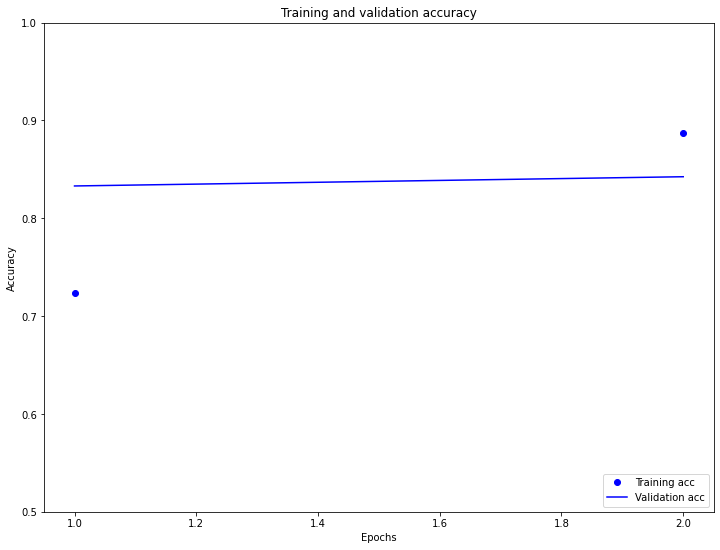

<Figure size 432x288 with 0 Axes>

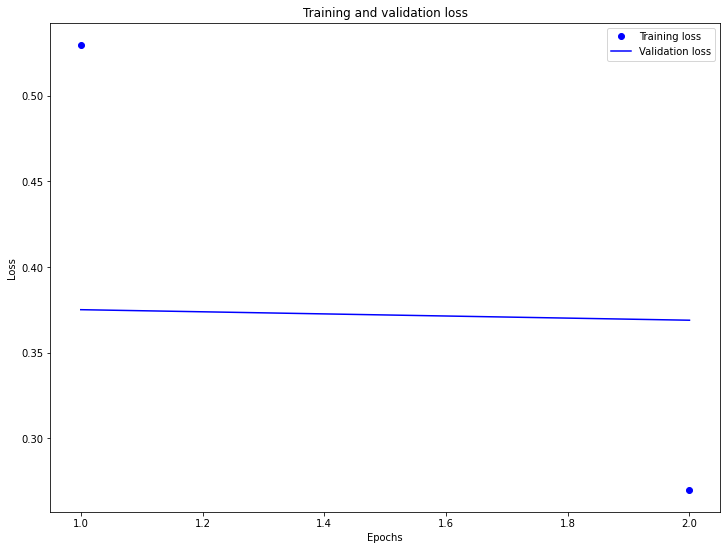

In [36]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

# clear previous figure

plt.clf()

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make Predictions from Fabricated Reviews

In [37]:
# Creating a function that returns predictions about the reviews


def predict_review(text):
  encoded_text = encoder.encode(text)
  encoded_text = tf.cast(encoded_text, tf.float32)
  prediction = model.predict(tf.expand_dims(encoded_text, 0))
  return prediction

In [38]:
# Testing the review

review = ('Just loved it. My kids thought the movie was cool. '
         'Even my wife liked it.')

pred = predict_review(review)
pred, pred.shape

(array([[0.9973917]], dtype=float32), (1, 1))

In [39]:
def palatable(pred):
  score = tf.squeeze(pred,0).numpy()
  return score[0]

In [40]:
# Invoke the function

score = palatable(pred)
score, score.shape

(0.9973917, ())

In [41]:
# Plain english

def impression(score):
  if score >= 0.5:
    return "positive impression"
  else:
    return "negative impression"

In [42]:
# Invoke the function

impression(score)

'positive impression'

In [43]:
# testing another example

review = ('The movie absolutely sucked. '
          'No character development. '
          'Dialogue just blows.')

pred = predict_review(review)
score = palatable(pred)
print (impression(score))

negative impression


# Make Predictions on a test data batch

In [44]:
# Predict from the test set batch and display the first review

# get predictions from 1st test batch 

for sample, target in test_ds.take(1):
  y_pred_64 = model.predict(sample)

In [45]:
# display first review from this batch

print("review:",end=" ")
print(encoder.decode(sample[0])[177:307])

review: absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies.


In [46]:
# display first label from this batch

print("label:",end=" ")
print(target[0].numpy(),br)

label: 1 



In [47]:
# Display number of examples in the batch

print("samples and target in first batch:",end=" ")
len(sample) , len(target)

samples and target in first batch: 

(64, 64)

In [48]:
# Get the first prediction

print(y_pred_64[0])

[0.73507255]


In [49]:
# Make it palatable

impression(y_pred_64[0])

'positive impression'

In [50]:
# Compare the prediction to the actual label

impression(y_pred_64[0]) , impression(target[0].numpy())

('positive impression', 'positive impression')

# Prediction Accuracy for the First Batch

In [51]:
# creating a function to convert an impression back to a label of either 1 or 0

def convert_label(feeling):
  if feeling == "positive impression":
    return 1
  else:
    return 0
  

In [52]:
# Return prediction accuracy for the entire first batch

ls = []
n = len(target)
for i, _ in enumerate(range(n)):
  t = target[i].numpy() # labels
  p = convert_label(impression(y_pred_64[i])) # predictions
  if t == p: ls.append(True)
correct = ls.count(True)
acc = correct / n
batch_accuracy = str(int(np.round(acc, 2) * 100)) + '%'
print ('accuracy for the first batch:', batch_accuracy)

accuracy for the first batch: 81%


# Leverage Pretrained Embeddings

# Load the IMDB Dataset

In [53]:
data, info = tfds.load("imdb_reviews",as_supervised=True,with_info=True,shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIA7FIH/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIA7FIH/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteIA7FIH/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [54]:
# Display metadata

info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

# Build the Input Pipeline

In [55]:
# Create train and test sets

train, test = data["train"], data["test"]

In [56]:
# Batch and prefetch

batch_size = 32
train_set = train.repeat().batch(batch_size).prefetch(1)
test_set = test.batch(batch_size).prefetch(1)

In [57]:
# Inspect tensors

train_set, test_set

(<PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>,
 <PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>)

# Create the Pretrained Model

In [58]:
import tensorflow_hub as hub


In [59]:
#clear any previous models

tf.keras.backend.clear_session()

In [60]:
model = tf.keras.Sequential([
  hub.KerasLayer(
      'https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1',
      dtype=tf.string, input_shape=[], output_shape=[50]),
  Dense(128, activation='relu'),
  Dense(1, activation='sigmoid')
])

# Compile the Model

In [61]:
# Compile the model

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the Model

In [62]:
#Train the model

# to suppress unimportant error message

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [63]:
history = model.fit(train_set,steps_per_epoch=train_size, epochs=5,validation_data=test_set)

Epoch 1/5
25000/25000 [==============================] - 198s 8ms/step - loss: 0.4809 - accuracy: 0.7689 - val_loss: 0.5164 - val_accuracy: 0.7470
Epoch 2/5
25000/25000 [==============================] - 202s 8ms/step - loss: 0.4291 - accuracy: 0.7996 - val_loss: 0.5585 - val_accuracy: 0.7329
Epoch 3/5
25000/25000 [==============================] - 199s 8ms/step - loss: 0.3927 - accuracy: 0.8201 - val_loss: 0.6096 - val_accuracy: 0.7243
Epoch 4/5
25000/25000 [==============================] - 199s 8ms/step - loss: 0.3661 - accuracy: 0.8356 - val_loss: 0.6606 - val_accuracy: 0.7189
Epoch 5/5
25000/25000 [==============================] - 200s 8ms/step - loss: 0.3461 - accuracy: 0.8468 - val_loss: 0.7130 - val_accuracy: 0.7124


# Make Predictions

In [64]:
# Make predictions based on the first test_set batch

for sample, target in test_set.take(1):
  y_pred_32 = model.predict(sample)

In [65]:
# Display misclassifications in test_set by index

for i in range(batch_size):
  p = convert_label(impression(y_pred_32[i]))
  l = target[i].numpy()
  if p != l:
    print("pred: ",p,"actual",l,"indx:",i)

pred:  0 actual 1 indx: 1
pred:  1 actual 0 indx: 13
pred:  1 actual 0 indx: 17
pred:  0 actual 1 indx: 18
pred:  0 actual 1 indx: 21
pred:  1 actual 0 indx: 23
pred:  0 actual 1 indx: 25
pred:  0 actual 1 indx: 29


# Calculate Prediction Accuracy for the first First Batch

In [66]:
ls = []
n = len(target)
for i, _ in enumerate(range(n)):
  t = target[i].numpy() # labels
  p = convert_label(impression(y_pred_32[i])) # predictions
  if t == p: ls.append(True)
correct = ls.count(True)
acc = correct / n
batch_accuracy = str(int(np.round(acc, 2) * 100)) + '%'
print ('accuracy for the first batch:', batch_accuracy)

accuracy for the first batch: 75%


# Explore IMDb with Keras

In [67]:
# Load the keras IMDb

train, test = tf.keras.datasets.imdb.load_data()

17473536/17464789 [==============================] - 0s 0us/step


In [68]:
# Create variables to represent reviews and labels

train_reviews, train_labels = train[0], train[1]
test_reviews, test_labels = test[0], test[1]

In [69]:
#Display the shape of train and test review samples

train_reviews.shape, test_reviews.shape

((25000,), (25000,))

In [70]:
# Display the shape of train and test labels

test_labels.shape, test_labels.shape

((25000,), (25000,))

# Explore the Train Sample

In [71]:
# Display label categories and number of unique words

print("categories:",np.unique(train_labels))
print("number of unique words:",len(np.unique(np.hstack(train_reviews))))

categories: [0 1]
number of unique words: 88585


In [72]:
# Checking how many words are in the longest training review

longest = np.amax([len(i) for i in train_reviews])
print("longest review:",longest)

longest review: 2494


In [73]:
# Get the index of the longest review

mid_result = np.where([len(i) for i in train_reviews] == longest)
longest_index = mid_result[0][0]
longest_index

17934

# Create a Decoding Function

In [74]:
def readable(review):
  index = tf.keras.datasets.imdb.get_word_index()
  reverse_index = dict([(value, key)\
                        for (key, value) in index.items()])
  return ' '.join( [reverse_index.get(i - 3, '?')\
                    for i in review])

# Invoke the Decoding Function

In [75]:

review = readable(train_reviews[longest_index])
print ()
print ('review:', end=' ')

# just display a slice of the full review
print (review[:50] + ' ...', br)

label = train_labels[longest_index]
idea = impression(label)
print (idea, br)

# verify length of review
print (len(train_reviews[longest_index]))

1654784/1641221 [==============================] - 0s 0us/step

review: ? match 1 tag team table match bubba ray and spike ... 

positive impression 

2494


In [76]:
# Finding the minimum number of words

shortest = np.amin([len(i) for i in train_reviews])
print ('shortest review:', shortest)

shortest review: 11


In [77]:
# obtaining the index of the shortest review in the train sample

result = np.where([len(i) for i in train_reviews] == shortest)
shortest_index = result[0][0]
shortest_index

6719

In [78]:
# Display the review its label in readable form and its length


review = readable(train_reviews[shortest_index])
print (review[2:], br)

label = train_labels[shortest_index]
idea = impression(label)
print (idea, br)

# verify length of review
print (len(train_reviews[shortest_index]))

i wouldn't rent this one even on dollar rental night 

negative impression 

11


# Continue Exploring the Training Sample

In [79]:
# Review the avg review length

length = [len(i) for i in train_reviews]

print ('average review length:', np.mean(length))

average review length: 238.71364


In [80]:
# Display the first label and its review encoded as integers

first_label = train_labels[0]

print('label:', first_label, end=' ')

idea = impression(first_label)
print ('(' + idea + ')', br)

# display slice of first review
print (train_reviews[0][:20])

# display readable slice of first review
print (readable(train_reviews[0][:20]))

label: 1 (positive impression) 

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25]
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you


In [81]:
# Display the first review in readable form

review = readable(train_reviews[0])
print (review[2:105] + ' ...')

this film was just brilliant casting location scenery story direction everyone's really suited the part ...


# Train Keras IMDb Data

In [82]:
# limit vocabulary to 8000 most commonly used words in reviews
vocab_size = 8000

In [83]:
maxlen = 80

# Load Data

In [84]:
# Load data with limited vocabulary

(x_train, y_train), (x_test, y_test) =\
tf.keras.datasets.imdb.load_data(num_words=vocab_size)

In [85]:
# Display info about train and test data

print ('train and test features:')
print (len(x_train), 'train sequences')
print (len(x_test), 'test sequences', br)
print ('sequence shape before padding:')
print ('x_train shape:', x_train.shape)
print ('x_test shape:', x_test.shape)

train and test features:
25000 train sequences
25000 test sequences 

sequence shape before padding:
x_train shape: (25000,)
x_test shape: (25000,)


# Pad samples

In [86]:
# Convert train and test sets to numpy

x_train = np.asarray(x_train)
x_test = np.asarray(x_test)

In [87]:
# Import the appropriate library

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [88]:
# Pad samples to ensure that all sequences are of the same length

print('padded sequences (samples, maxlen):')
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

padded sequences (samples, maxlen):
x_train shape: (25000, 80)
x_test shape: (25000, 80)


# Build the Input pipeline

In [89]:
# Initialize pipeline variables

buffer_size = 10000
batch_size = 512

In [90]:
# Prepare train data for TensorFlow consumption

train_k = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train))
train_ks = train_k.shuffle(
    buffer_size).batch(batch_size).prefetch(1)

In [91]:
# Prepare test data for TensorFlow consumption

test_k = tf.data.Dataset.from_tensor_slices(
    (x_test, y_test))
test_ks = test_k.batch(batch_size).prefetch(1)

# Build the Model

In [92]:
# Clear any previous models

tf.keras.backend.clear_session()

In [93]:
# Create the model

embed_size = 128
model = Sequential([
  Embedding(vocab_size, embed_size, mask_zero=True,
            input_shape=[None]),
  GRU(128, return_sequences=True),
  GRU(128),
  Dense(1, activation="sigmoid")
])

# Compile the Model

In [94]:
# Compile

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Train the Model

In [95]:
# Suppress error messages

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [96]:
# Train

epochs = 2

model.fit(train_ks, batch_size=BATCH_SIZE,
          epochs=epochs, validation_data=(test_ks))

Epoch 1/2
49/49 [==============================] - 40s 651ms/step - loss: 0.5435 - accuracy: 0.7055 - val_loss: 0.3897 - val_accuracy: 0.8234
Epoch 2/2
49/49 [==============================] - 30s 603ms/step - loss: 0.3152 - accuracy: 0.8670 - val_loss: 0.3709 - val_accuracy: 0.8338


# Predict

In [97]:
# Get predictions


In [98]:
k_pred = model.predict(test_ks)

In [99]:
# Display the first prediction

impression(k_pred[0][0])

'negative impression'

In [100]:
# Display a slice of the review

pred_first = readable(x_test[0])
pred_first[26:53]

'please give this one a miss'

In [101]:
# Display the impression

impression(y_test[0])

'negative impression'